# Importing the dependencies

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [378]:
df= pd.read_csv(r"C:\Users\DELL\Desktop\Uday\Machine Learning\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [382]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [386]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [388]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [390]:
# when tried to change TotalCharges col to float it gave ValueError: could not convert string to float: ' '

In [394]:

# Replace all kinds of blank/empty entries with NaN
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

# Fill NaNs with mode of MonthlyCharges
mode_value = df['MonthlyCharges'].mode()[0]
df['TotalCharges'].fillna(mode_value, inplace=True)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16776\4077272835.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mode_value, inplace=True)


In [396]:
df['TotalCharges'] # changed to float

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# Exploratory Data Analysis - EDA


In [399]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765618
std,0.368612,24.559481,30.090047,2266.763110
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


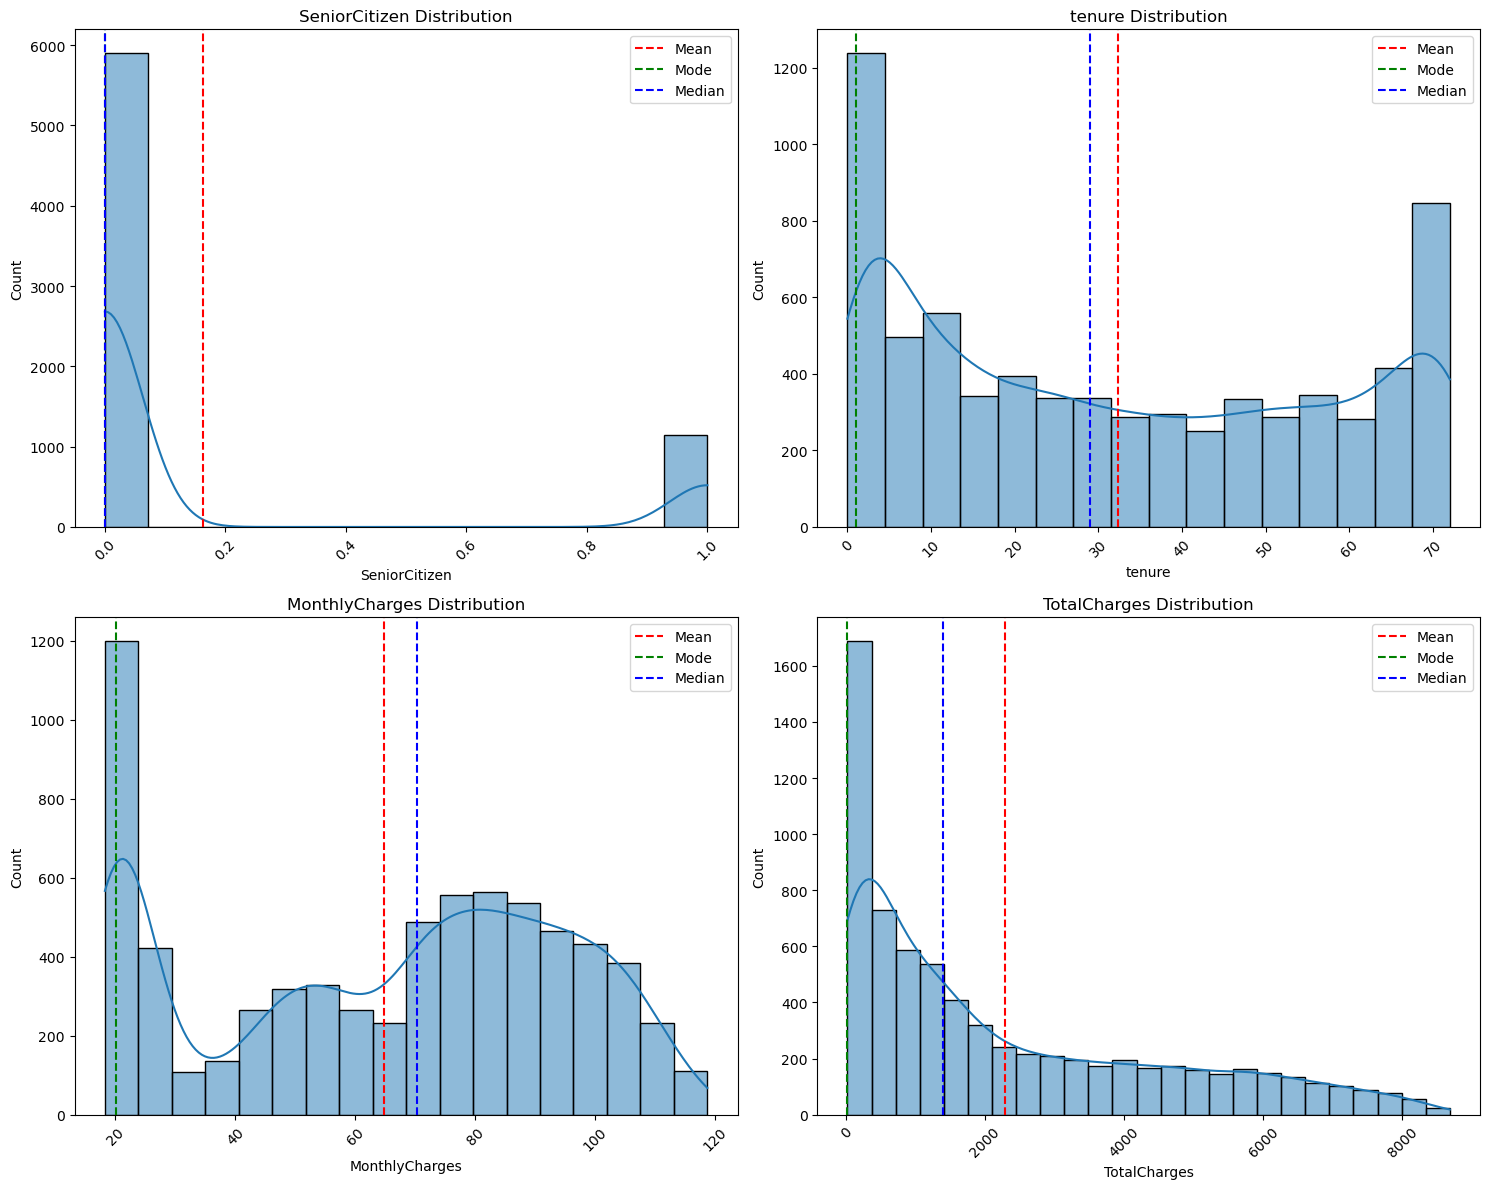

In [401]:
Numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, kde=True)
    
    col_mean = df[col].mean()
    col_mode = df[col].mode()[0]
    col_median = df[col].median()

    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_mode, color="green", linestyle="--", label="Mode")
    plt.axvline(col_median, color="blue", linestyle="--", label="Median")

    plt.legend()
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


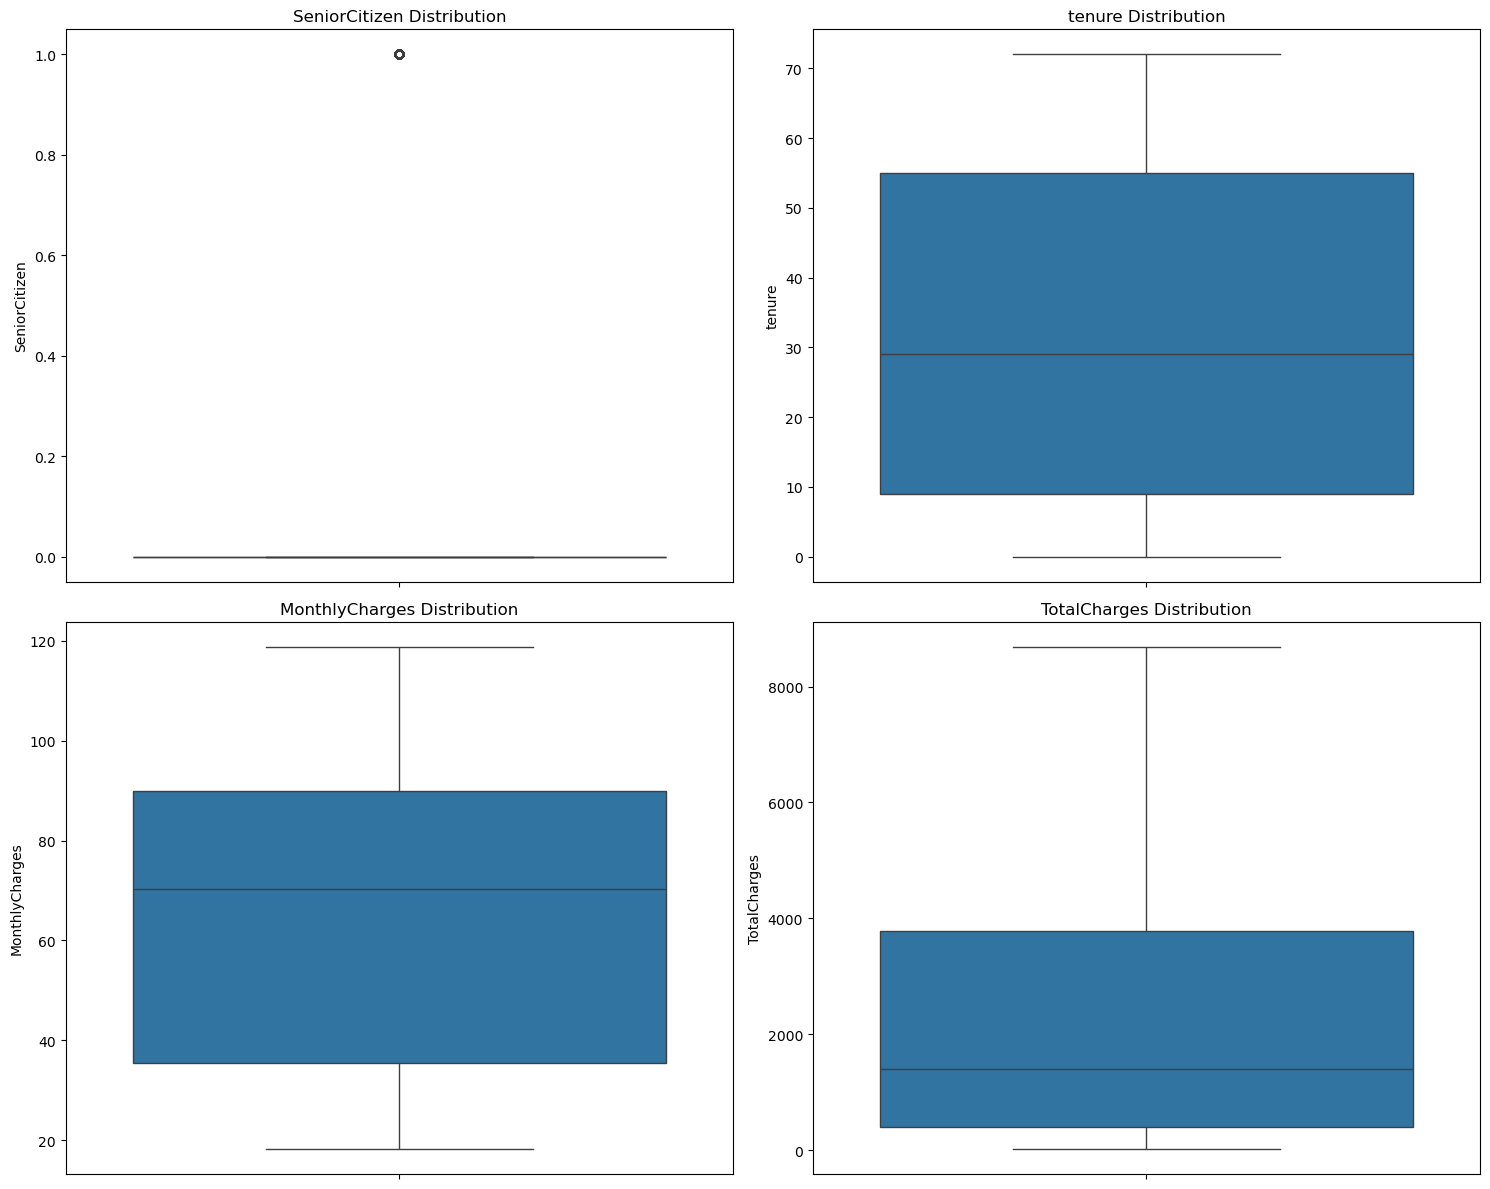

In [403]:
Numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 
                'TotalCharges']

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 2, i+1)  # Create subplots in a 2x2 grid
    sns.boxplot(data=df, y=col)  
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [405]:
# obeservation:
# We will proceed with the data as is, acknowledging the observed skewness. Our initial step is to evaluate the performance of our models in this state.
# In the subsequent iteration, we will address the skewness by applying transformations, such as log scaling or standardization. 
# This will allow us to properly assess the performance of linear models like SVM, logistic regression, and CNNs."

In [407]:
# Lets try more visulation to understadn the data further

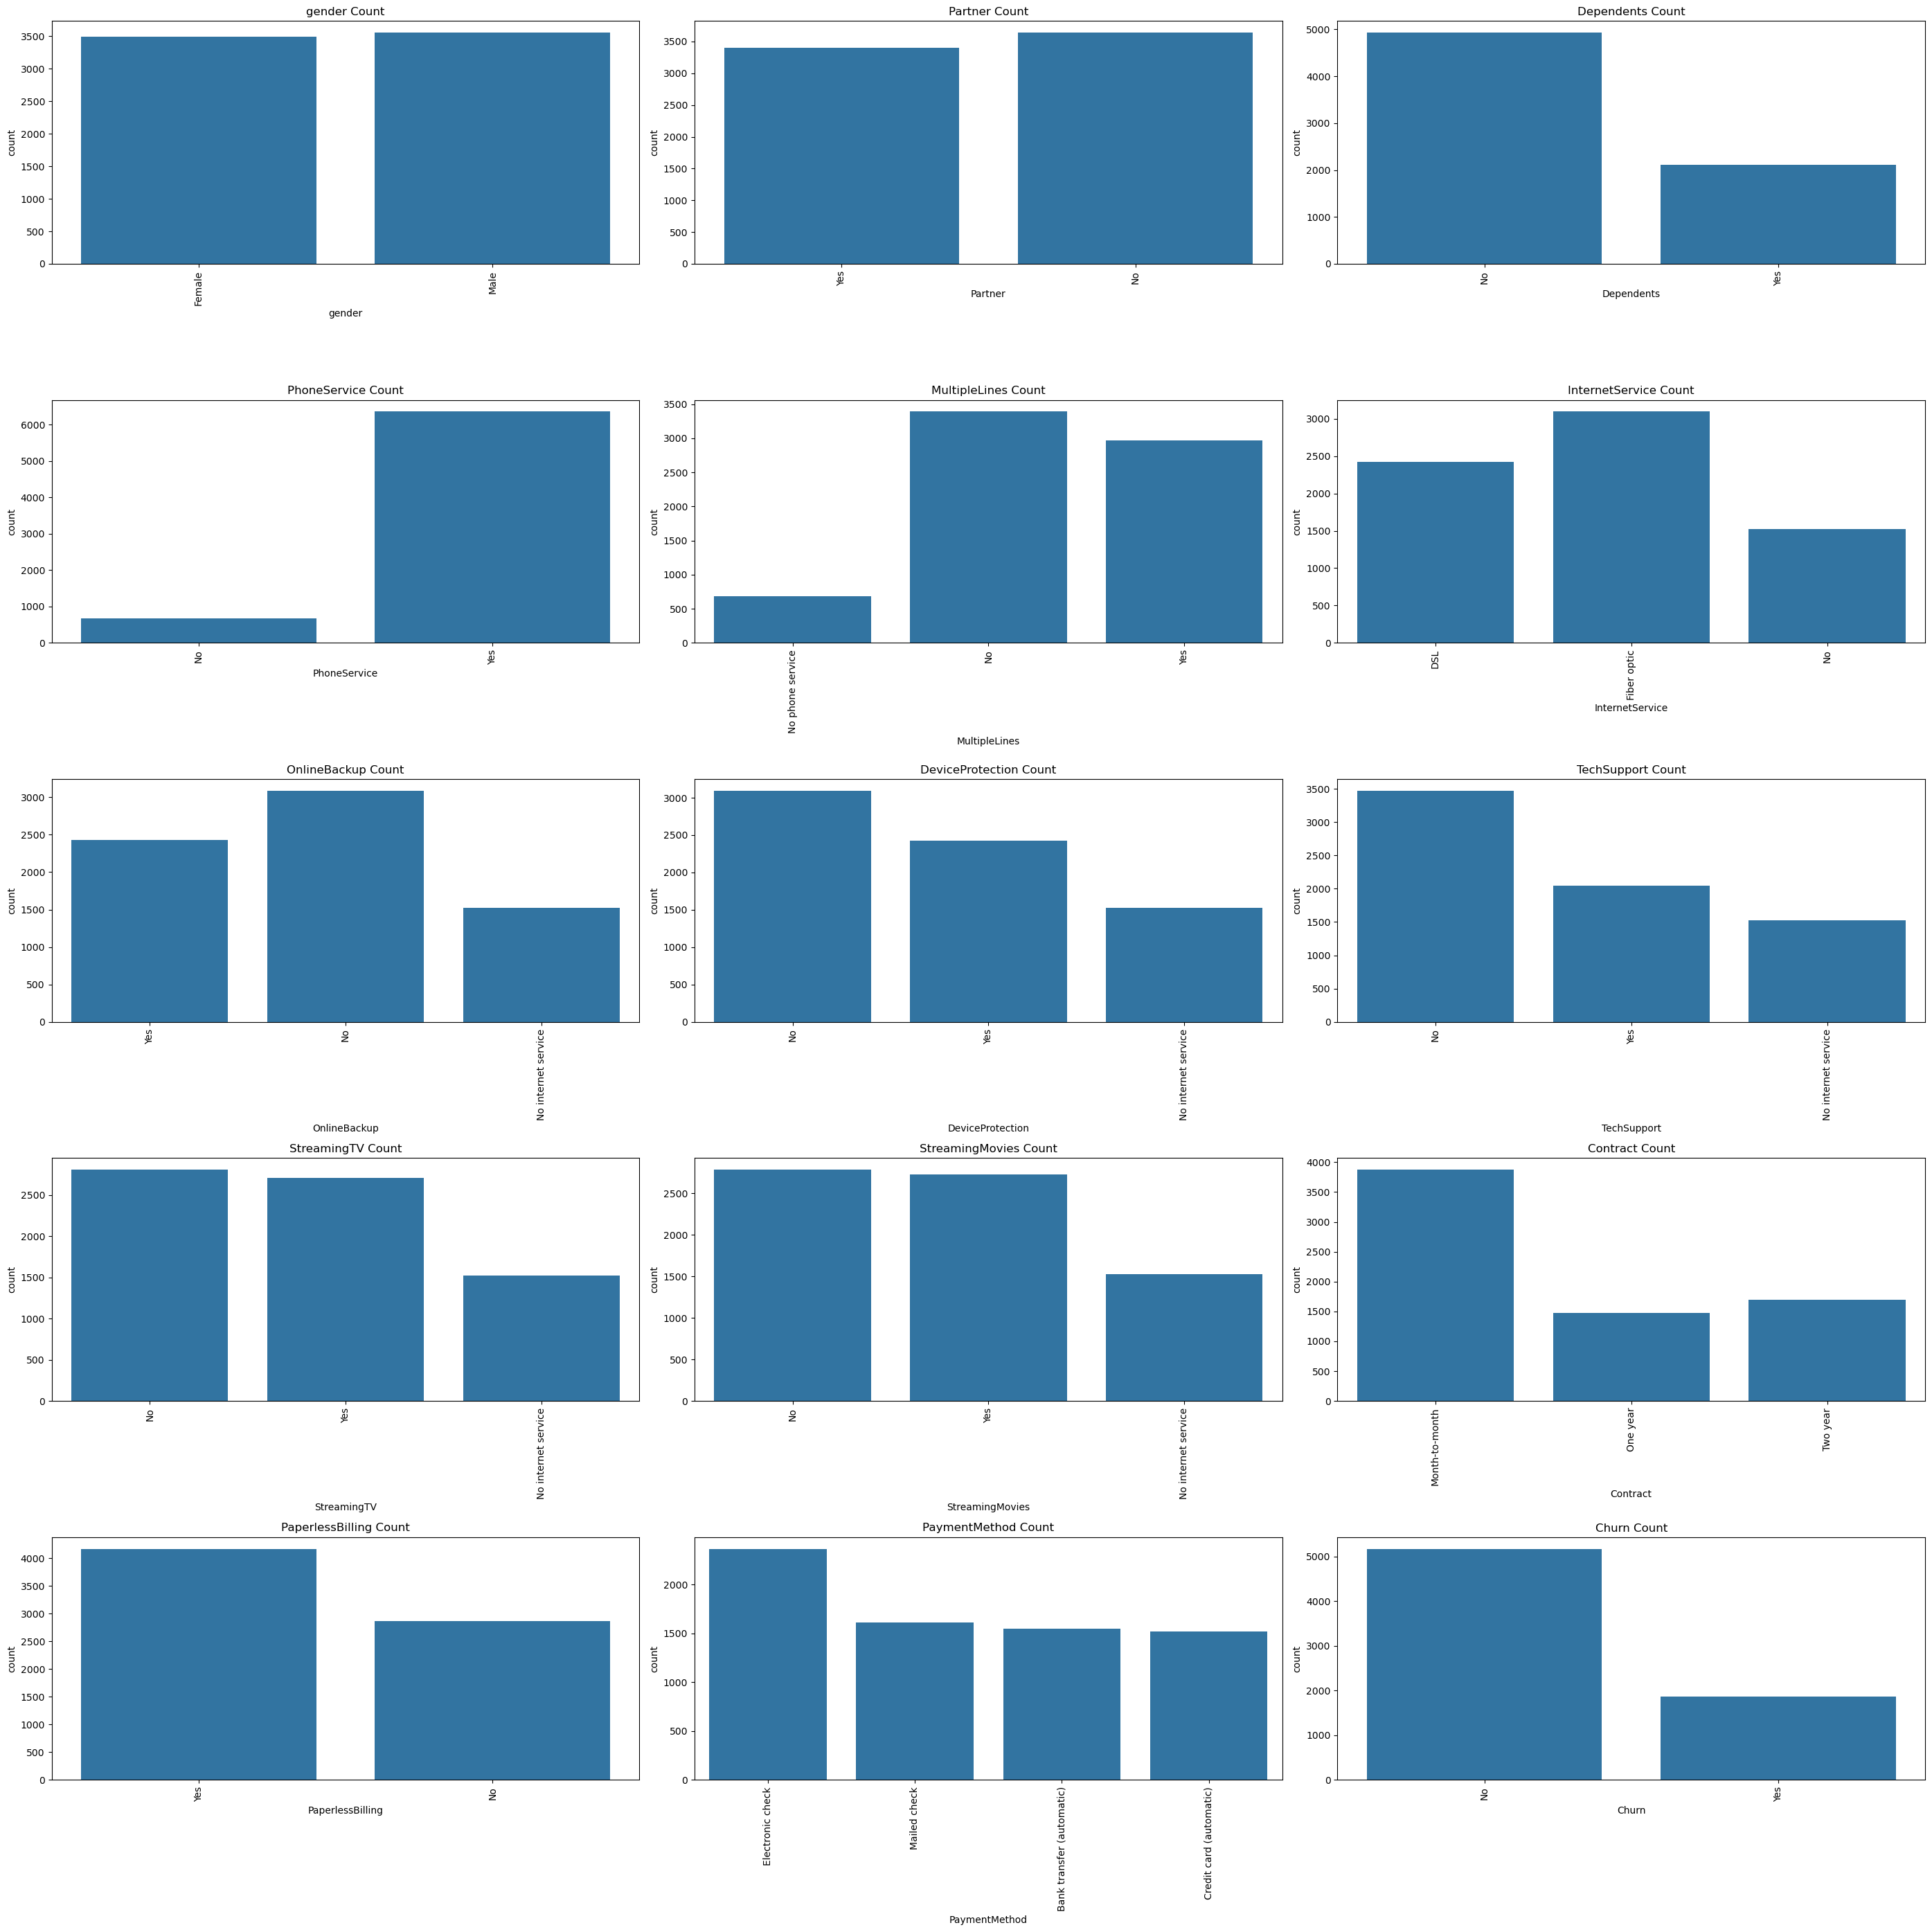

In [409]:
categorical_cols = ['gender', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup','DeviceProtection','TechSupport',
                    'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

plt.figure(figsize=(28, 28))  # figure size

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i + 1)  # Create subplot in 2 rows, 3 columns
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


In [411]:
# obeservations:
# 1. class imbalance identified in target column- churn
# 2. customer ID is not required

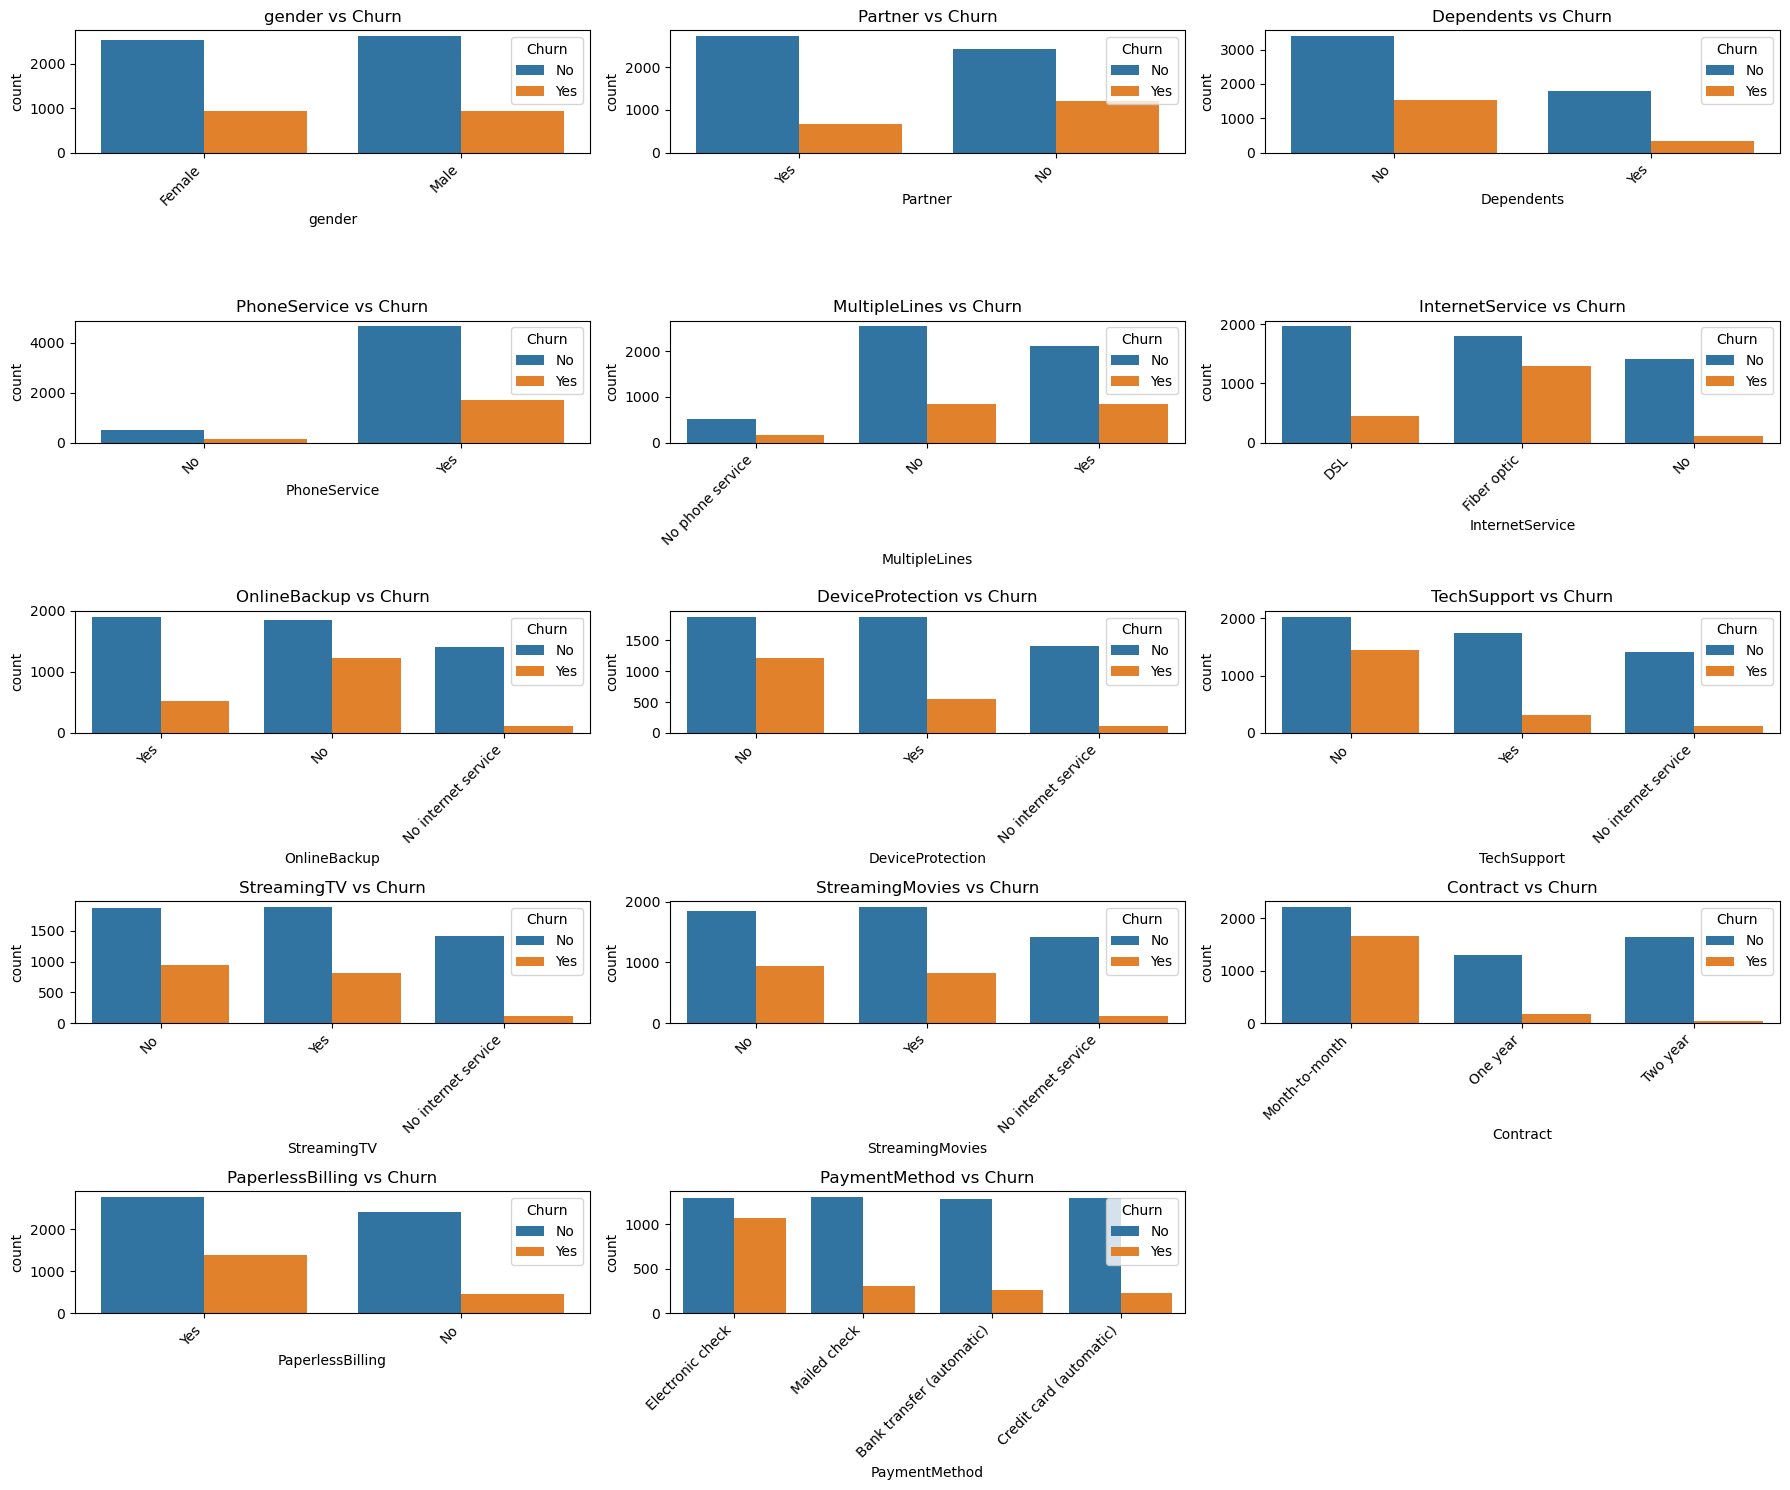

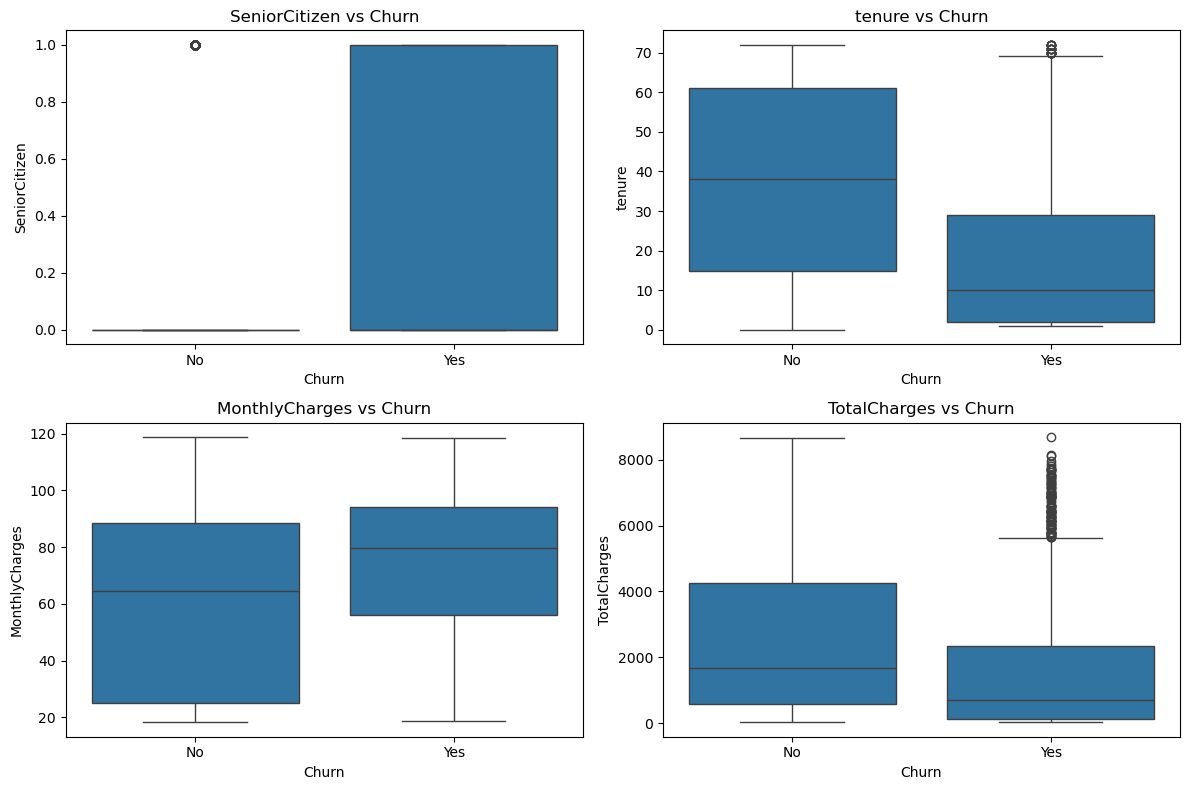

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Columns
categorical_cols = ['gender', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Numeric Columns
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# **For Categorical Variables:**
plt.figure(figsize=(18, 15))  # Adjust figure size as needed
for i, col in enumerate(categorical_cols[:-1]):  # Exclude 'Churn' from the categorical columns
    plt.subplot(5, 3, i + 1)  # Create subplot in 5 rows, 3 columns
    sns.countplot(data=df, x=col, hue='Churn')  # Countplot with 'Churn' as hue
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# **For Numeric Variables:**
plt.figure(figsize=(12, 8))  # Adjust figure size for numeric data
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)  # Create subplot in 2 rows, 2 columns
    sns.boxplot(data=df, x='Churn', y=col)  # Boxplot for numeric columns with respect to 'Churn'
    plt.title(f'{col} vs Churn')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


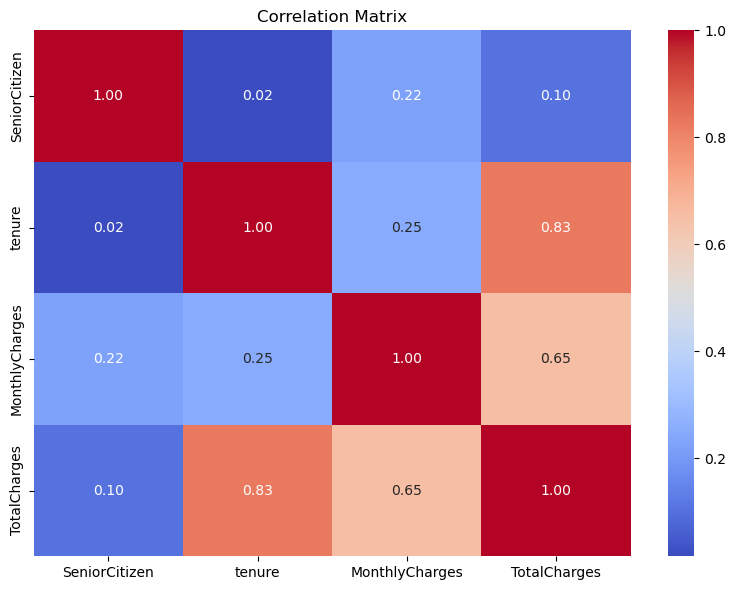

In [139]:
# 1. Correlation Matrix Heatmap

Numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
corr_matrix = df[Numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [449]:
df.drop('customerID', axis=1, inplace= True)

# Encoding Categorical values


In [429]:
df["Churn"].unique()

array([0, 1], dtype=int64)

In [431]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [433]:
df["Churn"].unique()

array([0, 1], dtype=int64)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [437]:
# Categorical Columns
categorical_cols = ['gender', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Numeric Columns
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Show unique values for categorical columns
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")

# Show unique values for numeric columns
print("Unique values in numeric columns:")
for col in numeric_cols:
    print(f"{col}: {df[col].unique()}\n")


Unique values in categorical columns:
gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Unique values in numeric columns:
SeniorCitizen: [0 1]

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44

In [441]:
from sklearn.preprocessing import LabelEncoder
import pickle

# List of categorical columns to encode

col = ['gender', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Dictionary to store encoders
encoders = {}

# Apply label encoding and store encoders
for i in col:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])
    encoders[i] = label_encoder

# Save all encoders in one pickle file AFTER the loop
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)


In [443]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [451]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


# modeling

In [455]:
from sklearn.model_selection import train_test_split

x = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)


In [457]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [459]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [461]:
y.shape

(7043,)

In [463]:
# applying SMOTE to balance target column 

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [465]:
y.shape, y_train.shape, y_test.shape

((7043,), (5634,), (1409,))

In [467]:
y_train_resampled.shape

(8296,)

In [469]:
print(y_train_resampled.value_counts())

Churn
0    4148
1    4148
Name: count, dtype: int64


In [471]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Function to compare classification models
def evaluate_classification_models(x, y, cv=5):
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Support Vector Machine': make_pipeline(StandardScaler(), SVC(probability=True)),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Naive Bayes': GaussianNB(),
    }

    results = []

    # Split data into train and test (inside the function)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Using StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    for name, model in models.items():
        try:
            # Train model
            model.fit(x_train, y_train)

            # Predictions
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

            # Cross-validation accuracy (on training set)
            cv_scores = cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy')
            cv_accuracy = np.mean(cv_scores)

            # Metrics
            accuracy = accuracy_score(y_test, y_test_pred)
            precision = precision_score(y_test, y_test_pred, average='binary')
            recall = recall_score(y_test, y_test_pred, average='binary')
            f1 = f1_score(y_test, y_test_pred, average='binary')
            roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])  # ROC AUC score

            # Confusion Matrix
            conf_matrix = confusion_matrix(y_test, y_test_pred)

            # Store results
            results.append({
                'Model': name,
                'CV Accuracy': round(cv_accuracy, 4),
                'Test Accuracy': round(accuracy, 4),
                'Precision (Test)': round(precision, 4),
                'Recall (Test)': round(recall, 4),
                'F1 Score (Test)': round(f1, 4),
                'ROC AUC (Test)': round(roc_auc, 4),
                'Confusion Matrix': conf_matrix.tolist()  # Convert to list for easier viewing
            })

        except Exception as e:
            print(f"Model {name} failed: {e}")
    
    # Convert results list to DataFrame and sort by 'Test Accuracy'
    results_df = pd.DataFrame(results)
    return results_df.sort_values(by='Test Accuracy', ascending=False)


# Split  data (x and y) as follows:
x = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Run the evaluation function
results = evaluate_classification_models(x, y)

# Display the results
print(results)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

                    Model  CV Accuracy  Test Accuracy  Precision (Test)  \
0     Logistic Regression       0.7985         0.8162            0.6792   
1  Support Vector Machine       0.7930         0.8070            0.6850   
4           Random Forest       0.7843         0.7977            0.6642   
3     K-Nearest Neighbors       0.7543         0.7779            0.6000   
5             Naive Bayes       0.7488         0.7566            0.5275   
2           Decision Tree       0.7244         0.7253            0.4821   

   Recall (Test)  F1 Score (Test)  ROC AUC (Test)          Confusion Matrix  
0         0.5791           0.6252          0.8616  [[934, 102], [157, 216]]  
1         0.5013           0.5789          0.8132   [[950, 86], [186, 187]]  
4         0.4772           0.5554          0.8349   [[946, 90], [195, 178]]  
3         0.4826           0.5349          0.7767  [[916, 120], [193, 180]]  
5         0.7721           0.6268          0.8430   [[778, 258], [85, 288]]  
2     

In [472]:
# obeservations: 
# Summary of Model Performance (Post-SMOTE)
# Top Accuracy: Logistic Regression (81.12%), SVM (80.48%)
# Best Precision: SVM (67.88%), Logistic Regression (66.77%)
# Best Recall: Naive Bayes (77.48%) but with low precision (53.22%)
# Best ROC AUC: Logistic Regression (0.8617), Random Forest (0.8450)

# Actionable Steps:
# Use Logistic Regression as your baseline model – best all-rounder (accuracy + ROC AUC).
# Test SVM further – slightly lower ROC AUC, but best precision.

# Decision Tree, random forest – Normalize the 'total charges' data using either a log transformation (for skewed data) or standard scaling, then re-evaluate your model's performance.

# Naive Bayes – only if high recall is crucial (e.g., minimizing false negatives).

# tuning parameters

In [474]:
# simple tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# models and their hyperparameter grids
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
            'solver': ['liblinear', 'saga'],  # Solvers for optimization
            'penalty': ['l1', 'l2']  # L1 and L2 regularization
        }
    },
    'Support Vector Machine': {
        'model': make_pipeline(StandardScaler(), SVC(probability=True)),
        'params': {
            'svc__C': [0.01, 0.1, 1, 10],  # Regularization parameter
            'svc__kernel': ['poly', 'sigmoid'],  # Kernel types
            'svc__gamma': [0.001, 0.01, 0.1]  # Kernel coefficient
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],  # Number of trees in the forest
            'max_depth': [10, None],  # Maximum depth of each tree
            'min_samples_split': [2, 7],  # Minimum samples to split a node
            'min_samples_leaf': [1, 3],  # Minimum samples at a leaf node
            'max_features': ['log2', None]  # Number of features to consider
        }
    }
}

# Function to evaluate models and hyperparameters using GridSearchCV
def evaluate_model_with_grid_search(x_train, y_train, x_test, y_test, models_params):
    results = []
    
    # Using Stratified K-Fold cross-validation to preserve class distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
    
    for model_name, model_dict in models_params.items():
        print(f"Evaluating {model_name}...")

        model = model_dict['model']
        param_grid = model_dict['params']

        # Initialize GridSearchCV with cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=skf, n_jobs=-1, scoring='accuracy', verbose=1)

        # Fit GridSearchCV to the training data
        grid_search.fit(x_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Make predictions
        y_test_pred = best_model.predict(x_test)
        y_train_pred = best_model.predict(x_train)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='binary')
        recall = recall_score(y_test, y_test_pred, average='binary')
        f1 = f1_score(y_test, y_test_pred, average='binary')
        roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
        conf_matrix = confusion_matrix(y_test, y_test_pred)

        # Store results
        results.append({
            'Model': model_name,
            'Best Hyperparameters': grid_search.best_params_,
            'Test Accuracy': round(accuracy, 4),
            'Precision (Test)': round(precision, 4),
            'Recall (Test)': round(recall, 4),
            'F1 Score (Test)': round(f1, 4),
            'ROC AUC (Test)': round(roc_auc, 4),
            'Confusion Matrix': conf_matrix.tolist()
        })
    
    # Convert results list to DataFrame and sort by 'Test Accuracy'
    return pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

# Run the evaluation function
results = evaluate_model_with_grid_search(x_train, y_train, x_test, y_test, models_params)

# Display the results
print(results)


Evaluating Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Evaluating Support Vector Machine...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Evaluating Random Forest...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
                    Model                               Best Hyperparameters  \
0     Logistic Regression  {'C': 100, 'penalty': 'l2', 'solver': 'libline...   
1  Support Vector Machine  {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...   
2           Random Forest  {'max_depth': 10, 'max_features': 'log2', 'min...   

   Test Accuracy  Precision (Test)  Recall (Test)  F1 Score (Test)  \
0         0.8062            0.6897         0.5222           0.5944   
1         0.8020            0.6831         0.5065           0.5817   
2         0.7984            0.6911         0.4674           0.5576   

   ROC AUC (Test)         Confusion Matrix  
0          0.8593  [[936, 90], [183, 200]]  
1          0.8533  [[93

In [475]:
# obeservation post tuning:
# 1. Performance is consistent — slight improvements overall:

# Logistic Regression remains best:
# Accuracy: 80.91% (vs 81.12%) – similar
# Precision: ↑ 69.26% (from 66.77%)
# ROC AUC: still strong at 0.8588

# 2. SVM improved precision after tuning, but recall still low → not ideal if recall matters.

# 3. Random Forest saw better precision but recall dropped → becomes less balanced.

# Recommendation:
# Use Tuned Logistic Regression – best balance of all metrics.

# Next Step: 
# Consider SVM or RF for higher precision (but lower recall) or normalize the data and re-run the analysis, including parameter tuning.

# Saving and loading the model to pickle file

In [523]:
import pickle

# Filter only Logistic Regression from the dictionary
logistic_model_param = {
    'Logistic Regression': models_params['Logistic Regression']
}

# Evaluate only Logistic Regression
logistic_results = evaluate_model_with_grid_search(x_train, y_train, x_test, y_test, logistic_model_param)

# Print the evaluation results
print(logistic_results)

# Refit GridSearchCV to get the best estimator again
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
log_model = logistic_model_param['Logistic Regression']['model']
log_params = logistic_model_param['Logistic Regression']['params']

grid_log = GridSearchCV(log_model, log_params, cv=skf, n_jobs=-1, scoring='accuracy')
grid_log.fit(x_train, y_train)

best_log_model = grid_log.best_estimator_

# ✅ Save the best logistic regression model
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(best_log_model, f)


Evaluating Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
                 Model                               Best Hyperparameters  \
0  Logistic Regression  {'C': 100, 'penalty': 'l2', 'solver': 'libline...   

   Test Accuracy  Precision (Test)  Recall (Test)  F1 Score (Test)  \
0         0.8062            0.6897         0.5222           0.5944   

   ROC AUC (Test)         Confusion Matrix  
0          0.8593  [[936, 90], [183, 200]]  


In [531]:
# After all preprocessing and have final X_train
column_order = x_train.columns.tolist()

# Save column order
with open("column_order.pkl", "wb") as f:
    pickle.dump(column_order, f)


In [533]:
import pandas as pd
import pickle

# 1. Load the trained model
with open("customer_churn_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# 2. Sample input data
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# 3. Convert to DataFrame
input_data_df = pd.DataFrame([input_data])

# 4. Load encoders
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

# 5. Apply label encoding
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

# 6. Align column order
with open("column_order.pkl", "rb") as f:
    column_order = pickle.load(f)
input_data_df = input_data_df[column_order]

# 7. Make predictions
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# 8. Output results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")


Prediction: Churn
Prediction Probability: [[0.43517894 0.56482106]]


In [527]:
import os

print(os.path.getsize("customer_churn_model.pkl"))  # Should be > 0
print(os.path.getsize("encoders.pkl"))        # Should be > 0


1232
1568
